# Import necessary libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [77]:
delivary_data=pd.read_csv('delivery_time.csv')
delivary_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [78]:
delivary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [79]:
delivary_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [80]:
delivary_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Perform assumption check

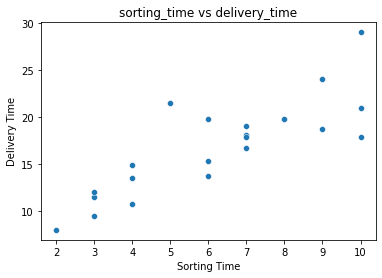

In [81]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=delivary_data)
plt.title("sorting_time vs delivery_time")
plt.show()

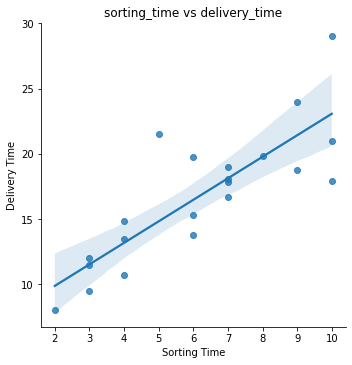

In [82]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivary_data)
plt.title("sorting_time vs delivery_time")
plt.show() 

In [83]:
delivary_data.corr().round(2)

,Delivery Time,Sorting Time
Delivery Time,1.00,0.83
Sorting Time,0.83,1.00


## Normality check

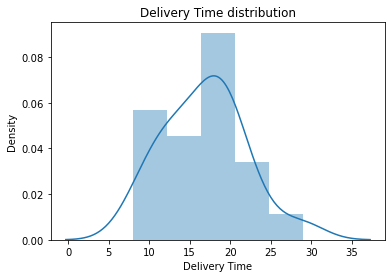

In [84]:
sns.distplot(a=delivary_data['Delivery Time'])
plt.title("Delivery Time distribution")
plt.show()

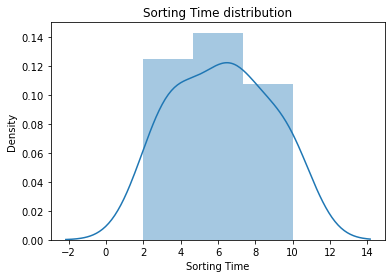

In [85]:
sns.distplot(a=delivary_data['Sorting Time'])
plt.title("Sorting Time distribution")
plt.show()

In [86]:
# normality check also failed

# Data Preparation & Model Building & Training

In [87]:
delivary_data.rename(columns={'Sorting Time':'ST','Delivery Time':'DT'},inplace=True)

In [88]:
delivary_data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [89]:
import statsmodels.formula.api as smf

In [90]:
lin_reg_model=smf.ols(formula="DT~ST",data=delivary_data).fit() ##OLS-ordinary least squares
lin_reg_model

# Model Testing

In [91]:
lin_reg_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [92]:
lin_reg_model.tvalues,lin_reg_model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [93]:
lin_reg_model.rsquared,lin_reg_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [94]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        17:53:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Prediction

In [95]:
predictions=lin_reg_model.predict(delivary_data['ST'])
predictions

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Transformation Techniques

In [96]:
def diagnostic_plot(df,variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

# Log transformation

In [97]:
import scipy.stats as stats

In [98]:
delivary_data['log_ST']=np.log(delivary_data["ST"]+1)

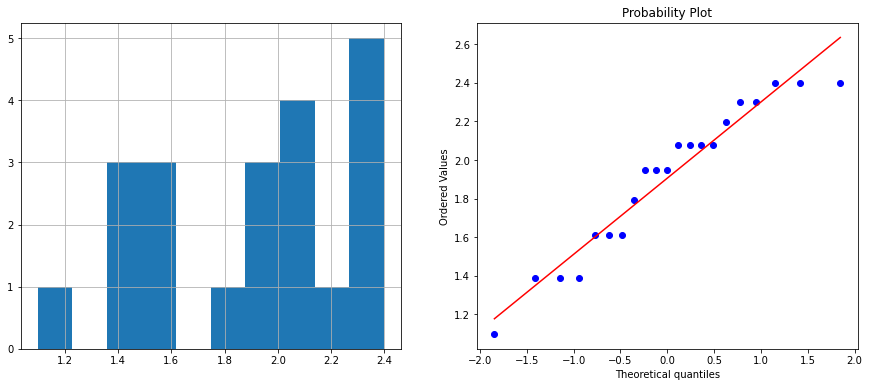

In [99]:
diagnostic_plot(delivary_data,"log_ST")

In [100]:
lin_reg_model1=smf.ols(formula="DT~log_ST",data=delivary_data).fit()

In [101]:
lin_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.51e-06
Time:                        17:53:17   Log-Likelihood:                -50.857
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0990      3.221     -1.273      0.218     -10.840       2.642
log_ST        10.9592      1.658      6.612      0.000       7.490      14.428
==============================================================================
Omnibus:                        5.318   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                3.314
Skew:                           0.929   Prob(JB):                        0.191
Kurtosis:                       3.580   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reciprocal transformation

In [102]:
delivary_data["recp_ST"]=1/(delivary_data["ST"]+1)

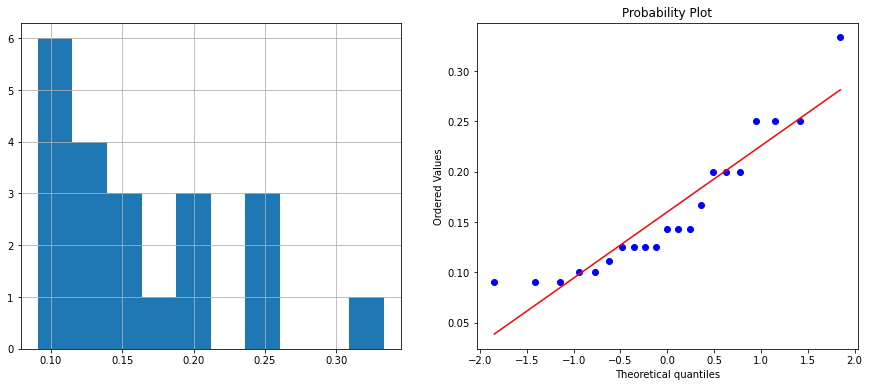

In [103]:
diagnostic_plot(delivary_data,"recp_ST")

In [104]:
lin_reg_model2=smf.ols(formula="DT~recp_ST",data=delivary_data).fit()

In [105]:
lin_reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     38.75
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           5.59e-06
Time:                        17:53:18   Log-Likelihood:                -51.724
No. Observations:                  21   AIC:                             107.4
Df Residuals:                      19   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7754      1.731     15.465      0.000      23.152      30.399
recp_ST      -62.3579     10.018     -6.225      0.000     -83.326     -41.390
==============================================================================
Omnibus:                        6.838   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.450
Skew:                           1.026   Prob(JB):                        0.108
Kurtosis:                       3.936   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Sqaure Root Tansformation

In [106]:
delivary_data['sqrt_ST']=delivary_data['ST']**(1/2)

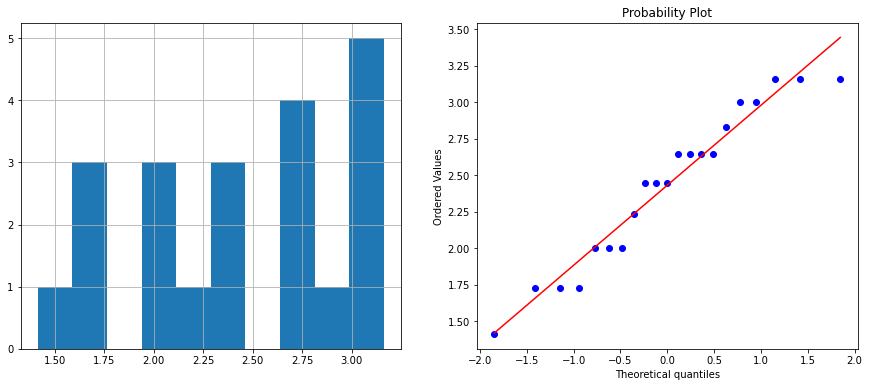

In [107]:
diagnostic_plot(delivary_data,"sqrt_ST")

In [108]:
lin_reg_model3=smf.ols(formula="DT~sqrt_ST",data=delivary_data).fit()

In [109]:
lin_reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        17:53:20   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_ST        7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Conclusion
# From all the models we can choose the lin_reg_model1 because it has more r squared value and also low AIC and BIC value